In [12]:
import sklearn

In [13]:
def orientation(p, q, r):
            # Função para calcular a orientação de três pontos (para determinar se são colineares, horários ou anti-horários)
            val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
            if val == 0:
                return 0  # Colinear
            return 1 if val > 0 else 2  # Horário ou anti-horário

def on_segment(p, q, r):
    # Função para verificar se o ponto q está no segmento entre p e r
    return (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
            q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1]))

def intersect(segment1, segment2):
    # Função para verificar se dois segmentos se intersectam
    x1, y1 = segment1[0]
    x2, y2 = segment1[1]
    x3, y3 = segment2[0]
    x4, y4 = segment2[1]

    o1 = orientation((x1, y1), (x2, y2), (x3, y3))
    o2 = orientation((x1, y1), (x2, y2), (x4, y4))
    o3 = orientation((x3, y3), (x4, y4), (x1, y1))
    o4 = orientation((x3, y3), (x4, y4), (x2, y2))

    if o1 != o2 and o3 != o4:
        return True  # Segmentos são não colineares e se intersectam

    if o1 == 0 and on_segment((x1, y1), (x3, y3), (x2, y2)):
        return True  # Segmento 1 é colinear com o segmento 2 e o ponto de interseção está no segmento 1
    if o2 == 0 and on_segment((x1, y1), (x4, y4), (x2, y2)):
        return True  # Segmento 1 é colinear com o segmento 2 e o ponto de interseção está no segmento 2
    if o3 == 0 and on_segment((x3, y3), (x1, y1), (x4, y4)):
        return True  # Segmento 2 é colinear com o segmento 1 e o ponto de interseção está no segmento 2
    if o4 == 0 and on_segment((x3, y3), (x2, y2), (x4, y4)):
        return True  # Segmento 2 é colinear com o segmento 1 e o ponto de interseção está no segmento 1

    return False  # Não há interseção

def linear_scan(segments):
    events = []
    for segment in segments:
        events.append((segment[0], 'left', segment))  # Adiciona ponto inicial como evento 'esquerda'
        events.append((segment[1], 'right', segment))  # Adiciona ponto final como evento 'direita'

    events.sort()  # Classifica os eventos em ordem crescente da posição

    active_segments = set()
    intersections = []

    for event in events:
        position, event_type, segment = event

        if event_type == 'left':
            for active_segment in active_segments:
                if intersect(segment, active_segment):
                    intersections.append((segment, active_segment))  # Segmentos se intersectam
            active_segments.add(segment)
        else:
            active_segments.remove(segment)

    return intersections

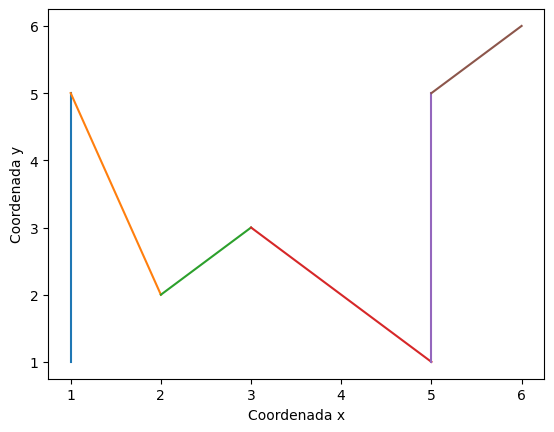

In [14]:
import matplotlib.pyplot as plt

def create_segments(points):
    segments = []
    points = sorted(points)
    for i in range(len(points) - 1):
        segment = (points[i], points[i+1])
        segments.append(segment)
    return segments

# Exemplo de entrada com um conjunto de pontos
points = [(1, 1), (5, 5), (3, 3), (6, 6), (2, 2), (1, 5), (5, 1)]

# Chame a função para criar os segmentos
segments = create_segments(points)

# Extrair as coordenadas x e y dos segmentos
x = [[point[0] for point in segment] for segment in segments]
y = [[point[1] for point in segment] for segment in segments]

# Criar um gráfico para plotar os segmentos
for i in range(len(x)):
    plt.plot(x[i], y[i])

# Definir rótulos para os eixos
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')

# Exibir o gráfico
plt.show()

In [17]:
if __name__ == '__main__':
    # Exemplo de uso
    segment1 = ((5.11, 12.899999999999999),(5.15, 21.32))
    segment2 = ((2, 2), (6, 6))
    segment3 = ((3, 3), (7, 7))
    segment4 = ((1, 5), (5, 1))

    segments = [segment1, segment2, segment3, segment4]

    intersections = linear_scan(segments)

    print(segments)

    if intersections:
        for segment1, segment2 in intersections:
            print(f"Interseção entre {segment1} e {segment2}")
    else:
        print("Nenhuma interseção encontrada.")



[((5.11, 12.899999999999999), (5.15, 21.32)), ((2, 2), (6, 6)), ((3, 3), (7, 7)), ((1, 5), (5, 1))]
Interseção entre ((2, 2), (6, 6)) e ((1, 5), (5, 1))
Interseção entre ((3, 3), (7, 7)) e ((1, 5), (5, 1))
Interseção entre ((3, 3), (7, 7)) e ((2, 2), (6, 6))
